In [110]:
#%pip install matplotlib

In [111]:
import random
import math
import matplotlib.pyplot as plt
import copy
import numpy as np

In [112]:
Data = []
with open('dataset.txt', 'r') as file:
    for line in file:
        values = line.split()
        x = float(values[0])
        y = float(values[1])
        Data.append([x,y])


In [113]:
def plot_clusters(clusters, centers):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, cluster in enumerate(clusters):
        color = colors[i % len(colors)]  
        x = [point[0] for point in cluster]
        y = [point[1] for point in cluster]
        plt.scatter(x, y, c=color, label=f'Cluster {i+1}')
    for center in centers:
        plt.scatter(center[0], center[1], c='black', marker='x', s=100)
    plt.title('K-means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [114]:
def assignCluster(K,Centers):
    Clusters = [[] for _ in range(K)]
    for sample in Data:
        minDist = float('inf')
        itr = 0
        for center in Centers:
            value = math.sqrt((center[0] - sample[0]) ** 2 + (center[1] - sample[1]) ** 2)
            if(value < minDist):
                minDist = value
                index = itr
            itr += 1
        Clusters[index].append(sample)
    return Clusters

In [115]:
def calculate_inertia(clusters, centers):
    inertia = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            inertia += (point[0] - centers[i][0]) ** 2 + (point[1] - centers[i][1]) ** 2 
    return inertia

In [116]:
def update_center(Clusters):
    Centers = []
    for cluster in Clusters:
        cluster_array = np.array(cluster)
        center = np.mean(cluster_array, axis=0)
        Centers.append(center.tolist())
    return Centers

In [117]:
def K_Means_Clustering(K):
    #initialize Center
    Centers = []
    for i in range(K):
        Centers.append(Data[random.randint(0, len(Data)-1)])
    Clusters = assignCluster(K,Centers)
    Centers.clear()
    itr = 1
    while(True):
        # center update
        Centers = update_center(Clusters)
        Shift = 0
        if itr > 1 and Shift < 50:
            break
        # temp clustering based on new center 
        Temp_Cluster = assignCluster(K,Centers)
        for sample in Data:
            found = 0
            for i in range(K):
                if sample in Clusters[i] and sample in Temp_Cluster[i]:
                    found = 1
                    break
            if found == 0:
                Shift += 1
        Clusters = copy.deepcopy(Temp_Cluster)
        itr += 1
    return Centers,Clusters      



For K =  2 , Inertia =  21.963901163812938


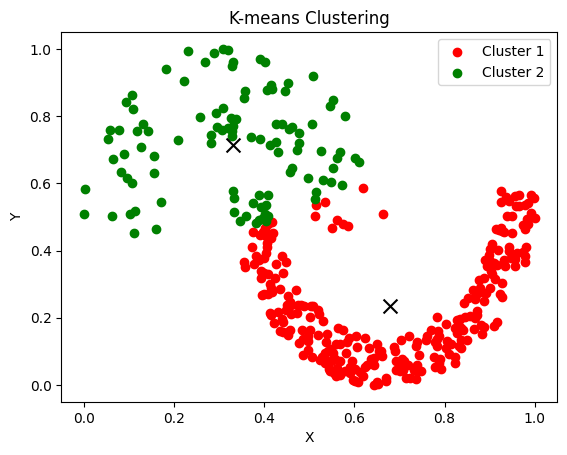

For K =  4 , Inertia =  9.827015685863044


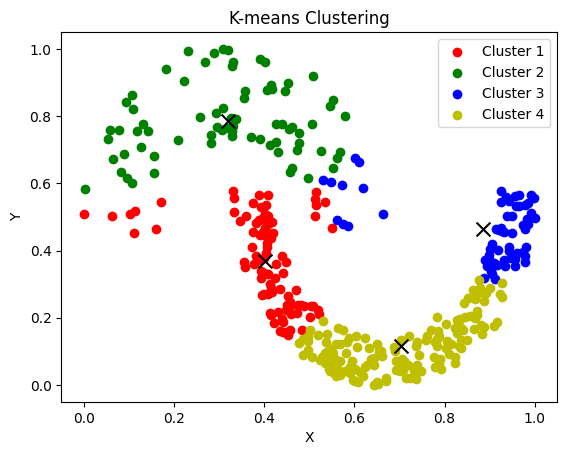

For K =  6 , Inertia =  8.237166245494778


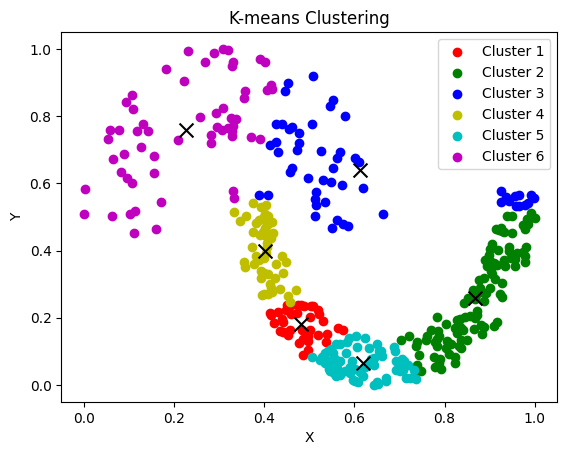

For K =  7 , Inertia =  5.618553440338323


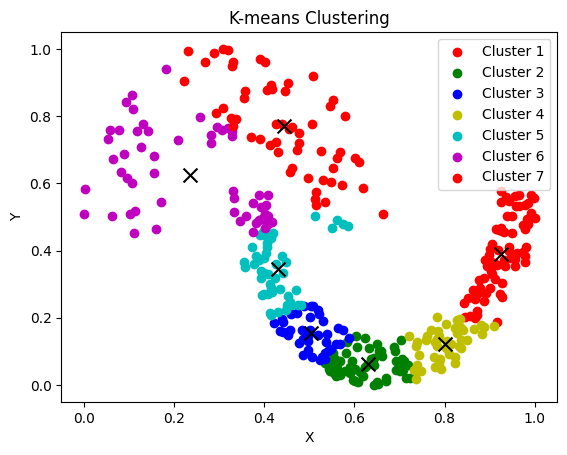

In [118]:
K = [2,4,6,7]
for k in K:
    Center, Cluster = K_Means_Clustering(k)
    intertia = calculate_inertia(Cluster,Center)
    print("For K = ",k,", Inertia = ",intertia)
    plot_clusters(Cluster,Center)